<a href="https://colab.research.google.com/github/tmq24/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

**Submission Link**: https://forms.gle/M2CxqVGrKLTzqR7g9 (Submit your .ipynb file)

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

In [ ]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import gdown

url = f"https://drive.google.com/uc?id=1RCqvOOg_tCeZheLf5fOsewL45X_mA7CZ"

output = "heart.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1RCqvOOg_tCeZheLf5fOsewL45X_mA7CZ
To: /content/heart.csv
100%|██████████| 32.8k/32.8k [00:00<00:00, 42.2MB/s]


'heart.csv'

## Load Dataset

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

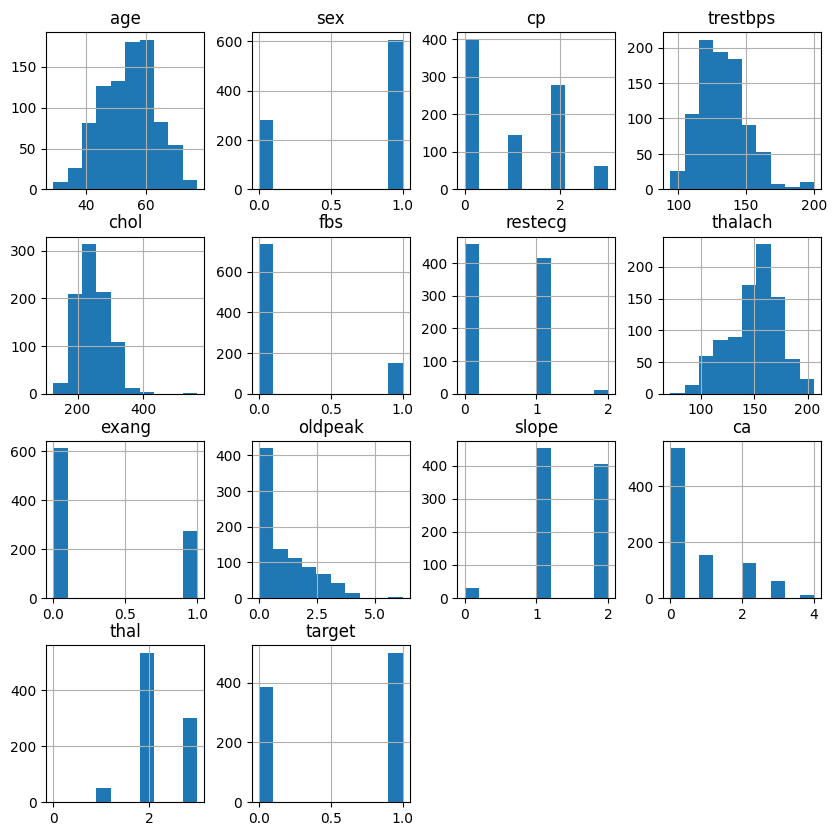

In [ ]:
PATH = "/content/heart.csv" # Path to your file

df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe
continous_columns = df.describe().columns
df.hist(column=continous_columns, figsize=(10, 10))

## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here

In [ ]:
def read_dataset(df):
    # Todo: read_csv from a path and return a DataFrame
    display(df.head())
    print("\nData stats")
    display(df.describe())
    display(df.info())
    print("\nUnique values in each column:")
    for column in df.columns:
        print(f"\n{column}:", df[column].unique())

    print("\nNull values in each column:")
    print(df.isnull().sum())
    return df

df = read_dataset(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1



Data stats


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


None


Unique values in each column:

age: [46 71 34 44 63 54 55 29 58 51 56 50 60 52 45 48 57 59 69 76 47 42 49 62
 67 61 43 40 68 64 39 70 53 65 41 66 38 37 77 35 74]

sex: [1 0]

cp: [0 1 2 3]

trestbps: [120 160 118 145 135 132 130 138 105 140 110 102 128 115 129 124 136 125
 150 112 134 148 142 164 108 192 144 122 100 114 106 104 180 178 146 117
 152 154 170 174 123 126  94 200 165 155 172 156 101]

chol: [249 302 303 304 305 306 301 300 299 298 210 211 212 213 214 209 208 207
 206 226 227 228 229 230 225 224 223 222 233 234 235 236 237 232 231 182
 183 184 185 186 181 180 179 178 307 308 342 343 344 345 346 341 340 339
 338 204 205 203 202 201 200 243 244 245 246 247 242 241 240 239 238 309
 310 311 312 294 295 296 297 293 292 291 290 254 255 256 257 258 253 252
 251 250 318 319 320 321 322 317 316 315 314 187 188 189 190 260 261 262
 263 264 259 196 197 198 199 195 194 193 192 354 355 356 357 358 353 352
 351 350 219 220 221 218 217 216 215 248 265 266 337 336 168 169 170 171
 172 167

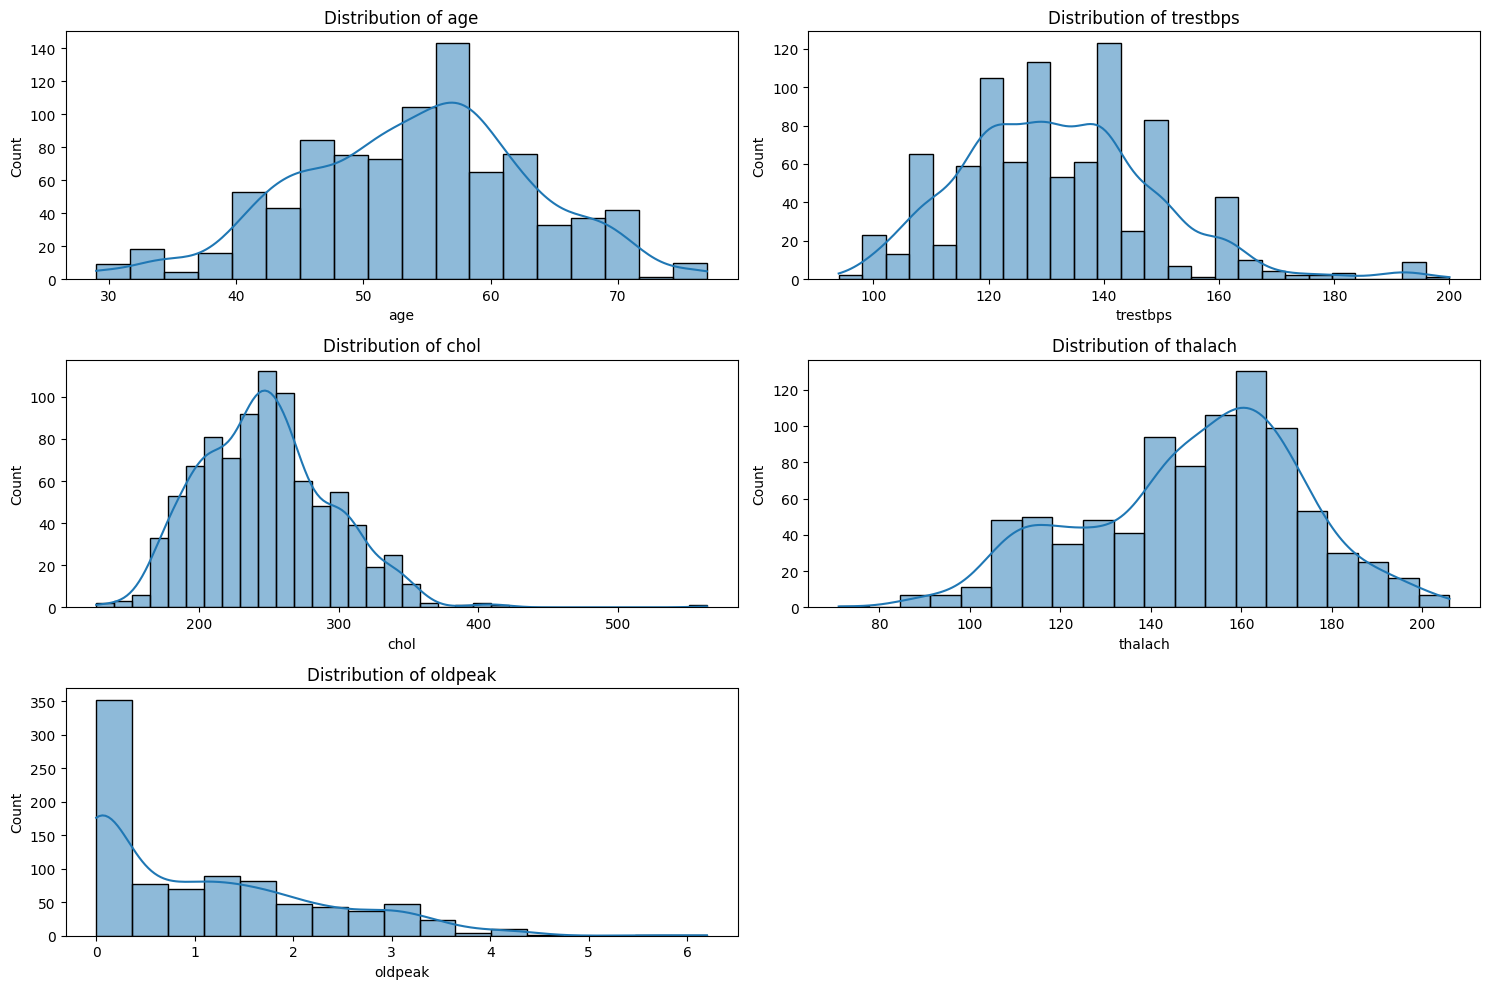

In [ ]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

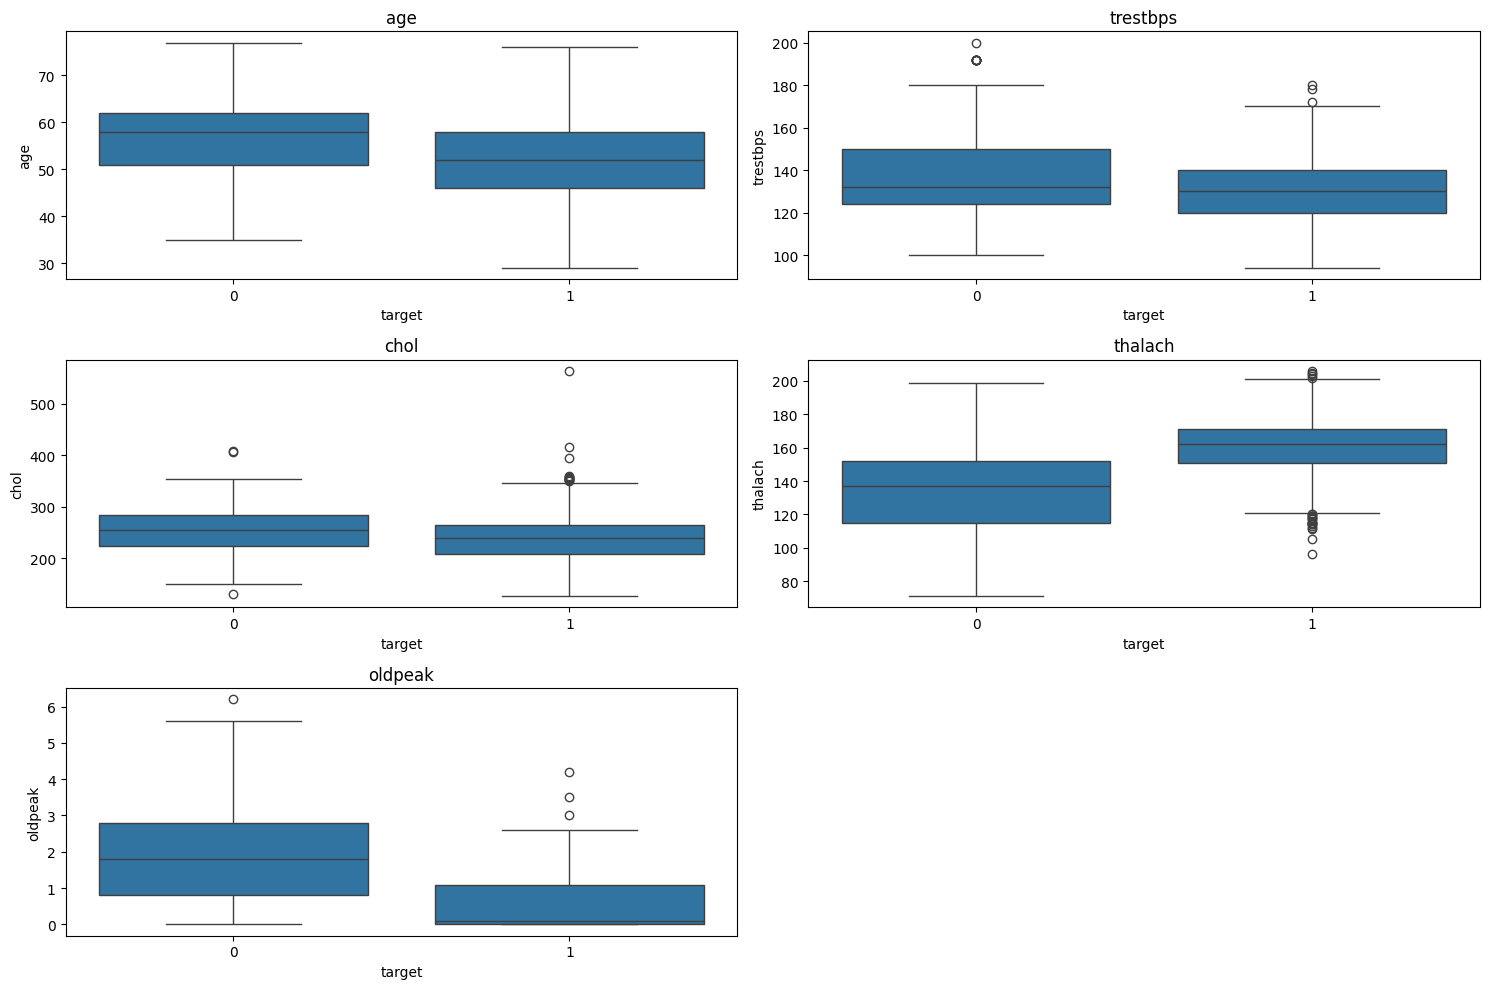

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.copy()
    return df

In [ ]:
df = preprocessing_data(df.copy())

## Feature Engineering

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.877950,1,0,-0.721358,0.031839,0,0,-0.229720,0,-0.246927,2,0,3,0
1,1.862936,0,1,1.659875,1.155116,0,1,0.523172,0,-0.595575,2,2,2,1
2,1.862936,0,1,1.659875,1.176310,0,1,0.564999,0,-0.595575,2,2,2,1
3,1.862936,0,1,1.659875,1.197504,0,1,0.606826,0,-0.595575,2,2,2,1
4,1.862936,0,1,1.659875,1.218698,0,1,0.648654,0,-0.595575,2,2,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.078459,-0.038434,0.337231,0.222152,0.187199,0.086401,-0.364585,0.125929,0.260906,-0.219664,0.271855,0.049096,-0.232576
sex,-0.078459,1.000000,0.013230,0.064870,-0.280802,0.123895,-0.241043,-0.096892,0.130696,0.152399,-0.009482,0.120516,0.212362,-0.283901
cp,-0.038434,0.013230,1.000000,0.063611,-0.157302,0.094775,0.047164,0.381308,-0.434926,-0.181597,0.142356,-0.283616,-0.253087,0.520575
trestbps,0.337231,0.064870,0.063611,1.000000,0.022509,0.157461,-0.106654,-0.082958,-0.006576,0.169383,-0.067141,0.176673,0.053659,-0.194818
chol,0.222152,-0.280802,-0.157302,0.022509,1.000000,-0.079892,0.006748,-0.050853,0.157342,0.061578,-0.001511,0.213909,0.151240,-0.093199
fbs,0.187199,0.123895,0.094775,0.157461,-0.079892,1.000000,-0.039141,-0.021372,-0.145109,-0.059736,-0.093437,0.204107,-0.113579,0.017736
restecg,0.086401,-0.241043,0.047164,-0.106654,0.006748,-0.039141,1.000000,0.088967,-0.079988,-0.050961,0.114417,-0.109777,-0.035165,0.143819
thalach,-0.364585,-0.096892,0.381308,-0.082958,-0.050853,-0.021372,0.088967,1.000000,-0.420237,-0.398322,0.463312,-0.298086,-0.128411,0.512224
exang,0.125929,0.130696,-0.434926,-0.006576,0.157342,-0.145109,-0.079988,-0.420237,1.000000,0.269824,-0.296775,0.219526,0.291320,-0.492947
oldpeak,0.260906,0.152399,-0.181597,0.169383,0.061578,-0.059736,-0.050961,-0.398322,0.269824,1.000000,-0.503280,0.287669,0.245363,-0.540943


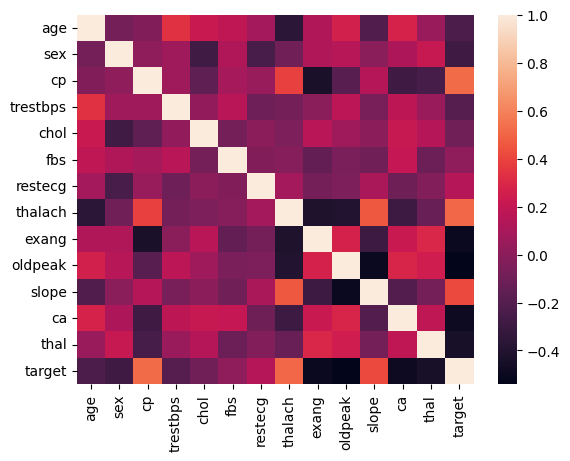

In [ ]:
from sklearn.preprocessing import StandardScaler
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = df.copy()

    scaler = StandardScaler()
    numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    # (sex, cp, fbs, restecg, exang, slope, ca, thal, target) have been encoded
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data
# Run the function
display(df.head())
display(df.corr())

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('target', axis=1) # Todo: Select features
    y = df['target'] # Todo: Select label
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    return X, y

X, y = prepare_X_y(df)

X shape: (886, 13)
y shape: (886,)


# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def build_model(X, y):
    """
    Design your model and train it (including best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    pipeline = make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=10000, random_state=42)
    )

    param_grid = [
        {'logisticregression__solver': ['liblinear'],
         'logisticregression__penalty': ['l1', 'l2']},
        {'logisticregression__solver': ['newton-cg', 'lbfgs', 'sag'],
         'logisticregression__penalty': ['l2', 'none']},
        {'logisticregression__solver': ['saga'],
         'logisticregression__penalty': ['l1', 'l2', 'none', 'elasticnet'],
         'logisticregression__l1_ratio': [0.2, 0.5, 0.8]}
    ]

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1
    )

    grid_search.fit(X, y)

    print("Best parameters:", grid_search.best_params_)

    return grid_search.best_estimator_

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    print("precision", precision_score(y_true , y_pred))
    print("recall", recall_score(y_true , y_pred))
    print("accuracy", accuracy_score(y_true , y_pred))
    print("F1", f1_score(y_true , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))
    print("Classification report: \n", classification_report(y_true , y_pred))

    print("Main Score (Recall):")
    main_score = recall_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
pred = model.predict(testX)

display(model)
display(model.score(trainX, trainY))
display(model.score(testX, testY))

Best parameters: {'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

0.9477401129943502

0.9606741573033708

In [ ]:
print("-----------Test Performance-----------")
calculate_performance(testY, pred)
print("\n-----------Train Performance-----------")
calculate_performance(trainY, model.predict(trainX))

-----------Test Performance-----------
precision 0.9626168224299065
recall 0.9716981132075472
accuracy 0.9606741573033708
F1 0.9671361502347418
Confusion matrix: 
 [[ 68   4]
 [  3 103]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.96      0.97      0.97       106

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178

Main Score (Recall):

-----------Train Performance-----------
precision 0.9429280397022333
recall 0.9644670050761421
accuracy 0.9477401129943502
F1 0.9535759096612296
Confusion matrix: 
 [[291  23]
 [ 14 380]]
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       314
           1       0.94      0.96      0.95       394

    accuracy                           0.95       708
   macro

0.9644670050761421

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. Recall là metric chính được chọn trong bài toán này để đánh giá mô hình vì nếu người có bị bệnh tim mà mô hình dự đoán là không (FN) thì có khả năng dẫn đến bệnh nhân không được điều trị kịp thời." \
           "Other conclusion: Precision thì ít quan trọng hơn trong bài toán này vì nếu mô hình dự đoán nhầm thì rủi ro nguy hiểm sẽ không cao. Còn muốn cân bẳng giữa precision và recall thì chọn F1(trong trường hợp không xác định được mục tiêu của bài toán)."

get_conclusion()

'7. Recall là metric chính được chọn trong bài toán này để đánh giá mô hình vì nếu người có bị bệnh tim mà mô hình dự đoán là không (FN) thì có khả năng dẫn đến bệnh nhân không được điều trị kịp thời.Other conclusion: Precision thì ít quan trọng hơn trong bài toán này vì nếu mô hình dự đoán nhầm thì rủi ro nguy hiểm sẽ không cao. Còn muốn cân bẳng giữa precision và recall thì chọn F1(trong trường hợp không xác định được mục tiêu của bài toán).'